# Recreating figure
# May 29, 2017

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
VAT26 = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_T_20150508-20150508.nc')

In [13]:
V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_V_20150508-20150508.nc')
U = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_1h_20150507_20150509_grid_U_20150508-20150508.nc')

In [4]:
umask = mesh_mask.umask
vmask = mesh_mask.vmask

In [25]:
hu_0 = mesh_mask.e3u_0 * umask
new1 = hu_0.sum(dim= 'z')
new1

<xarray.DataArray (t: 1, y: 898, x: 398)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Dimensions without coordinates: t, y, x

In [29]:
fs3e = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/VAT26/SalishSea_00516241_restart.nc')
fs3e.fse3t_n

<xarray.DataArray 'fse3t_n' (t: 1, z: 40, y: 898, x: 398)>
[14296160 values with dtype=float64]
Dimensions without coordinates: t, z, y, x

In [31]:
new2 = umask * fs3e.fse3t_n

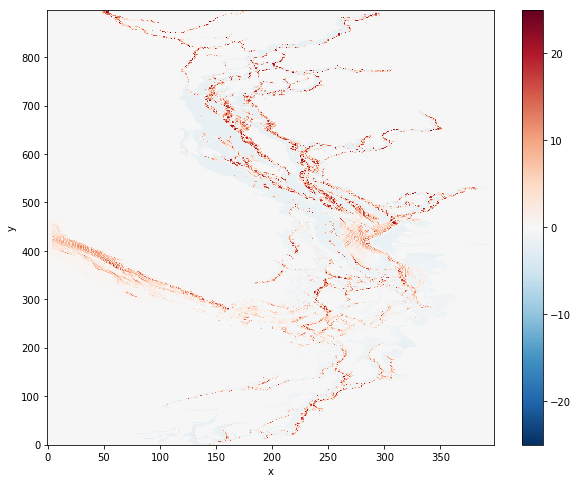

In [36]:
(new2.sum(dim='z') - new1).plot(figsize=(10,8))

In [37]:
hu_01 = mesh_mask.e3v_0 * vmask
new3 = hu_01.sum(dim= 'z')
new3

<xarray.DataArray (t: 1, y: 898, x: 398)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Dimensions without coordinates: t, y, x

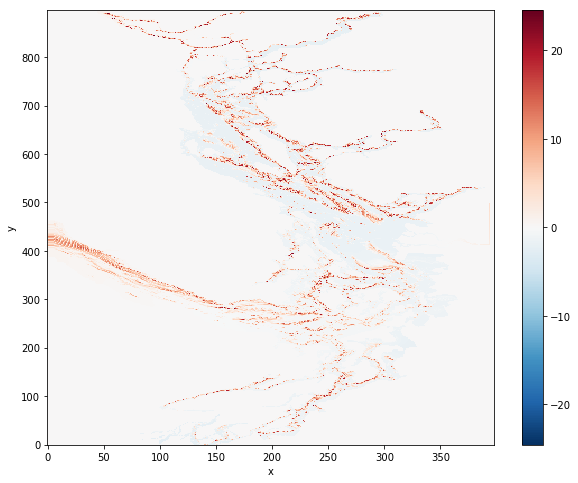

In [38]:
new4 = vmask * fs3e.fse3t_n
(new4.sum(dim='z') - new3).plot(figsize=(10,8))

In [39]:
V

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 40, nvertex: 4, time_counter: 24, x: 398, y: 898)
Coordinates:
  * depthv                (depthv) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lon               (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_centered         (time_counter) datetime64[ns] 2015-05-08T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2015-05-08T00:30:00 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area                  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bounds_lat            (y, x, nvertex) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bounds_lon            (y, x, nvertex) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    depthv_bounds         (depthv, axis_nbounds) float32 0.0 1.0 1.0 2.00001 ...
    time_centered_bounds  (time_counter, axis_nbounds) float64 3.64e+09 .

In [40]:
U

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthu: 40, nvertex: 4, time_counter: 24, x: 398, y: 898)
Coordinates:
  * depthu                (depthu) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lon               (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_centered         (time_counter) datetime64[ns] 2015-05-08T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2015-05-08T00:30:00 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area                  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bounds_lat            (y, x, nvertex) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bounds_lon            (y, x, nvertex) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    depthu_bounds         (depthu, axis_nbounds) float32 0.0 1.0 1.0 2.00001 ...
    time_centered_bounds  (time_counter, axis_nbounds) float64 3.64e+09 .

In [41]:
fs3e

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lat       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lev       (z) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    time_counter  (t) float64 5.162e+05
    kt            float64 5.162e+05
    ndastp        float64 2.015e+07
    adatrj        float64 239.0
    ssh_ibb       (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_b         (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_hc_b      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rnf_sc_b      (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    utau_b        (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vtau_b        (t, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    qns_b       